# Lung diseases dataset documentation

## Thoughts
this is my first ML project, that I decided to work on. Here, i am using the dataset provided by [@a3amat02](https://www.kaggle.com/a3amat02) on kaggle. 

The dataset includes patient data, and here is an overview:
|     |Column           |Non-Null Count  |Dtype|
|-----|-----------------|----------------|-------|
| 0   |Age              |4900 non-null   |float64|
| 1   |Gender           |4900 non-null   |object|
| 2   |Smoking Status   |4900 non-null   |object|
| 3   |Lung Capacity    |4900 non-null   |float64|
| 4   |Disease Type     |4900 non-null   |object|
| 5   |Treatment Type   |4900 non-null   |object|
| 6   |Hospital Visits  |4900 non-null   |float64|
| 7   |Recovered        |4900 non-null   |object|

although the dataset is not a very large one, and the resulting trained model won't be the most accurate, there is, it could serve a **_"fun"_** purpose for those, who are willing to try and see some predictions about ones risks and chances on the topic lung diseases.

So it well **neither** be an **exact, nor** a **trustworthy** estimator **for** one's condition as complex as **_health_**, but it could spread some awareness, that is based on pure statistics, for curiosity reasons.

## First of all, lets find our goals for the project

---

1.  **Find out gender spread lung diseases**
1. **Find out which diseases are the most dangerous and otherwise**
1.  **Find the best treatment for each disease**
1.  **Train a ML model on the given data to predict further chances based on new data**
1.  **Build a simple hosted application and host the model with the statistics and input field for user data to check on their chances for the selected stochastic model**

---

<details>
    <summary>The stochastic model will include:</summary>
   
    1. What disease does the patient tend to have

    2. Chances to survive the disease x
    
    3. What treatment is better for the patient regarding his data and disease
    
    4. How smoking influences his chances
    
    5. Optimal hospital visits for his disease

</details>


### Next, the data is loaded, cleaned and preprocessed for further training

In [70]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

data_unclean = pd.read_csv('C:/Users/Sachar/Desktop/Coding/Data Scince R/AI-Project/lung_disease_data.csv', header=0, sep=',')
# clean out the NaN values out of the dataset
data = data_unclean.dropna(axis=0)

print(data.info()) #reassure there are no NaN values

# separate features and labels
X = data.drop('Recovered', axis=1)
# print(X, "\n\n\n")
# target set
y = data['Recovered'].map({'No': 0, 'Yes': 1}) #rewrite recovered format from Yes/No to bin
# print(y, "\n\n\n")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

numerical_columns = ["Age", "Lung Capacity", "Hospital Visits"]
categorical_columns = [ "Gender","Smoking Status", "Disease Type", "Treatment Type"]

# Preprocessing explained: 
#  1. For numerical data: Impute the missing values with median, then scaler
#  2. For categorical data: Impute the missing values with mode, then one-hot encode them

# Preprocessing pipeline
preprocesser = ColumnTransformer(
    transformers=[
        ("num", Pipeline([
            ("imputer", SimpleImputer(strategy="median")),
            ("scaler", StandardScaler())
        ]), numerical_columns),
        ("cat", Pipeline([
            ("imputer", SimpleImputer(strategy="most_frequent")),
            ("encoder", OneHotEncoder(handle_unknown="ignore", sparse_output=False))
        ]), categorical_columns),
    ]
)
# Update ColumnTransformer for categoricals:
# categorical_imputer = SimpleImputer(strategy="constant", fill_value="Missing")

# preprocesser = ColumnTransformer(
#     transformers=[
#         ("num", SimpleImputer(strategy="median"), numerical_columns),
#         ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_columns),
#     ]
# )

# Fit preprocesser on training data and then transoform train/test

X_train = preprocesser.fit_transform(X_train)
X_test = preprocesser.transform(X_test)

# # scale for better performance

from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_train, y_train = smote.fit_resample(X_train, y_train)

<class 'pandas.core.frame.DataFrame'>
Index: 3236 entries, 0 to 5199
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              3236 non-null   float64
 1   Gender           3236 non-null   object 
 2   Smoking Status   3236 non-null   object 
 3   Lung Capacity    3236 non-null   float64
 4   Disease Type     3236 non-null   object 
 5   Treatment Type   3236 non-null   object 
 6   Hospital Visits  3236 non-null   float64
 7   Recovered        3236 non-null   object 
dtypes: float64(3), object(5)
memory usage: 227.5+ KB
None


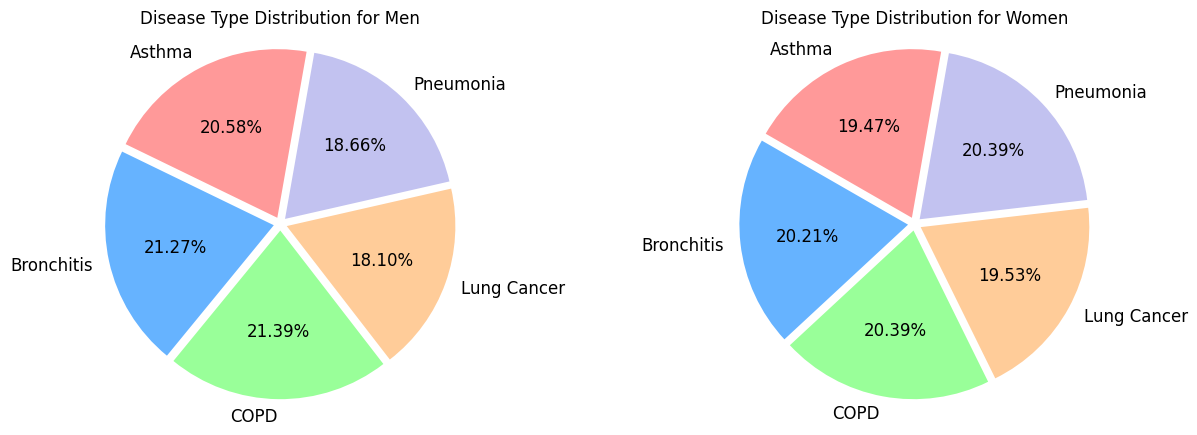

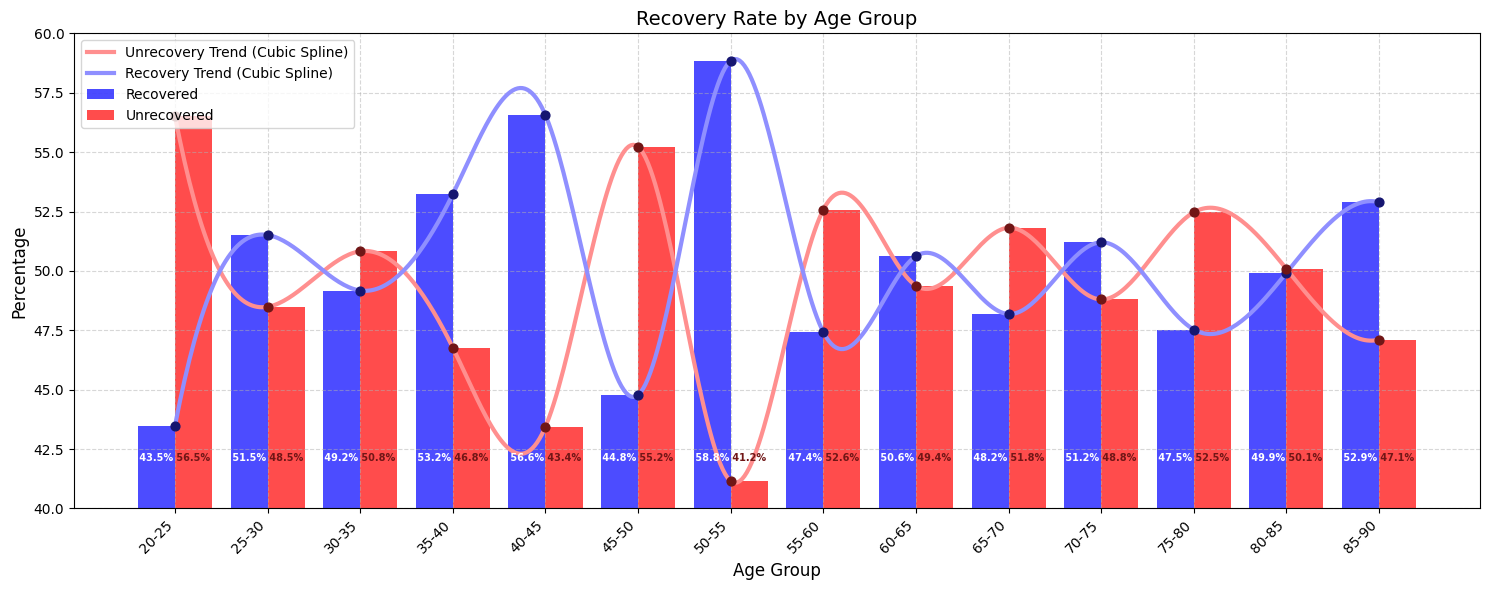

In [6]:
# i need male data, and female data. then i need to parse it the disease type in [], then calcualte its percentage relevant to the genders diseases sum


# biplot(d.types) for gender, smoking status, recovered

# age,gender, lung cap, hosp.v, disease, smoking to recover plot (quadratic curve)

# multibarplot(gender, smoking, lung cap) to d.types

#standart plot with different grafs, each for unique disease type, on the x-axis numerical: age, lung cap, hosp visits for recovery

# the same for death


import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import make_interp_spline, CubicSpline

male_data = data[data.Gender == "Male"]
male_data_diseases = male_data["Disease Type"].value_counts()
male_data_diseases_percentage = pd.DataFrame((male_data_diseases) / male_data_diseases.sum() * 100).sort_index().to_numpy().flatten()

female_data = data[data.Gender == "Female"]
female_data_diseases = female_data["Disease Type"].value_counts()
female_data_diseases_percentage = pd.DataFrame((female_data_diseases) / female_data_diseases.sum() * 100).sort_index().to_numpy().flatten()


male_disease_index = sorted(male_data["Disease Type"].unique())
female_disease_index = sorted(female_data["Disease Type"].unique())

# print(female_data_diseases_percentage)
# print(female_data_diseases / female_data_diseases.sum() * 100)
# print(male_data_diseases_percentage)
# print(male_data_diseases / male_data_diseases.sum() * 100)

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

axes[0].pie(male_data_diseases_percentage, labels=male_disease_index, colors=["#ff9999", "#66b3ff", "#99ff99", "#ffcc99", "#c2c2f0"],explode=[0.04]*5, startangle=80, textprops={"fontsize":12, "color":"black"}, autopct="%1.2f%%")
axes[0].set_title("Disease Type Distribution for Men")
axes[0].axis("equal")

axes[1].pie(female_data_diseases_percentage, labels=female_disease_index, colors=["#ff9999", "#66b3ff", "#99ff99", "#ffcc99", "#c2c2f0"],explode=[0.04]*5, startangle=80, textprops={"fontsize":12, "color":"black"}, autopct="%1.2f%%")
axes[1].set_title("Disease Type Distribution for Women")
axes[1].axis("equal")

plt.show()

age = sorted(data["Age"].unique())
lung_cap = data["Lung Capacity"]
hosp_visits = data["Hospital Visits"]
recovered = data["Recovered"]

# recovered for unique age total count 

recovered_per_age_in_percent = ((data.groupby("Age")["Recovered"].value_counts().unstack())) #splits a two valued column of no/yes into two separate
recovered_per_age_in_percent =((recovered_per_age_in_percent["Yes"]/(recovered_per_age_in_percent["Yes"]+recovered_per_age_in_percent["No"]))*100)

recovered_per_lung_capacity_in_percent = ((data.groupby("Lung Capacity")["Recovered"].value_counts().unstack())) #splits a two valued column of no/yes into two separate
recovered_per_lung_capacity_in_percent =((recovered_per_lung_capacity_in_percent["Yes"]/(recovered_per_lung_capacity_in_percent["Yes"]+recovered_per_lung_capacity_in_percent["No"]))*100)

recovered_per_hospital_visits_in_percent = ((data.groupby("Hospital Visits")["Recovered"].value_counts().unstack())) #splits a two valued column of no/yes into two separate
recovered_per_hospital_visits_in_percent =((recovered_per_hospital_visits_in_percent["Yes"]/(recovered_per_hospital_visits_in_percent["Yes"]+recovered_per_hospital_visits_in_percent["No"]))*100)


# print(recovered_per_hospital_visits_in_percent)
# print(recovered_per_lung_capacity_in_percent)

recovered_per_age_in_percent_meaned = []
for i in range(0, int(len(recovered_per_age_in_percent)/5)):
    value = 0
    for j in range(0, 5):
        value += recovered_per_age_in_percent.values[i*5+j]
    recovered_per_age_in_percent_meaned.append(value/5)
# print(recovered_per_age_in_percent_meaned)

# unrecoverable_per_age_in_percent = 100 - recovered_per_age_in_percent*2
unrecoverable_per_age_in_percent = []
for i in range(0, len(recovered_per_age_in_percent_meaned)):
    value = (100 - recovered_per_age_in_percent_meaned[i])
    unrecoverable_per_age_in_percent.append(value)
# print(unrecoverable_per_age_in_percent)

# print(len(recovered_per_age_in_percent)/10)

#need lung capacity and hospital visits distribution for recovered and unrecovered

lung_cap=[]
hospital_vis=[]
######

age_groups = ["20-25", "25-30", "30-35", "35-40", "40-45", "45-50", "50-55", 
              "55-60", "60-65", "65-70", "70-75", "75-80", "80-85", "85-90"]
midpoints = np.arange(22.5, 87.6, 5)  # Midpoints of age groups

# Create figure
fig, ax = plt.subplots(figsize=(15, 6))

# Plot bars (side-by-side)
bar_width = 2  # Width of each bar (5-year span)
recovered_bars=ax.bar(midpoints - bar_width/2, recovered_per_age_in_percent_meaned, width=bar_width, 
       label='Recovered', color='blue', alpha=0.7)
unrecovered_bars=ax.bar(midpoints + bar_width/2, unrecoverable_per_age_in_percent, width=bar_width, 
       label='Unrecovered', color='red', alpha=0.7)

def add_bar_labels(bars, text_color):
    for bar in bars:
        height = bar.get_height()
        # Position text at 40% of the bar's height (adjust 0.4 to move up/down)
        ax.text(bar.get_x() + bar.get_width()/2, 42, 
                f' {height:.1f}% ',  # Format to 1 decimal place
                ha='center', 
                color=text_color, fontsize=7, fontweight='bold')


# Cubic spline interpolation (ensures curve passes through all points)
cs_recovered = CubicSpline(midpoints, recovered_per_age_in_percent_meaned)
x_smooth = np.linspace(midpoints.min(), midpoints.max(), 500)
y_smooth = cs_recovered(x_smooth)

cs_unrecovered = CubicSpline(midpoints, unrecoverable_per_age_in_percent)
x_smooth_unrecovered = np.linspace(midpoints.min(), midpoints.max(), 500)
y_smooth_unrecovered = cs_unrecovered(x_smooth_unrecovered)

# Plot the interpolated curve
ax.plot(x_smooth, 100 - y_smooth, '-', color='#ff8f8f', linewidth=3,
        label='Unrecovery Trend (Cubic Spline)', zorder=3)
ax.plot(x_smooth_unrecovered,100 -y_smooth_unrecovered, '-', color='#8f8fff', linewidth=3, 
        label='Recovery Trend (Cubic Spline)', zorder=3)
ax.scatter(midpoints, recovered_per_age_in_percent_meaned, color='#161670', s=40, zorder=4, 
           )
ax.scatter(midpoints, unrecoverable_per_age_in_percent, color='#701616', s=40, zorder=4, 
           )

# Add labels - white text for dark bars
add_bar_labels(recovered_bars, 'white')  
add_bar_labels(unrecovered_bars, '#701616')

# Customize
ax.set_title("Recovery Rate by Age Group", fontsize=14)
ax.set_xlabel("Age Group", fontsize=12)
ax.set_ylabel("Percentage", fontsize=12)
ax.set_xticks(midpoints)
ax.set_xticklabels(age_groups, rotation=45, ha='right')
ax.legend(loc='upper left')
ax.set_ylim(40, 60)
ax.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


### **RandomForest**

In [71]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score

model = RandomForestClassifier(n_estimators=200, max_depth=10, random_state=42)
model.fit(X_train, y_train)
preditctions = model.predict(X_test)

print(f"Train accuracy: {model.score(X_train, y_train)}\n")
print(f"Test accuracy: {model.score(X_test, y_test)}\n")
print(classification_report(y_test, preditctions))

#try cross validation
scores = cross_val_score(model, X_train, y_train, cv=5)
print(f"Cross-validation accuracy: {np.mean(scores):.2f}")

Train accuracy: 0.9480122324159022

Test accuracy: 0.5277777777777778

              precision    recall  f1-score   support

           0       0.53      0.59      0.56       325
           1       0.53      0.47      0.50       323

    accuracy                           0.53       648
   macro avg       0.53      0.53      0.53       648
weighted avg       0.53      0.53      0.53       648

Cross-validation accuracy: 0.52


### **check for unnessecary categories**

> plot the relevant categories for randomforest

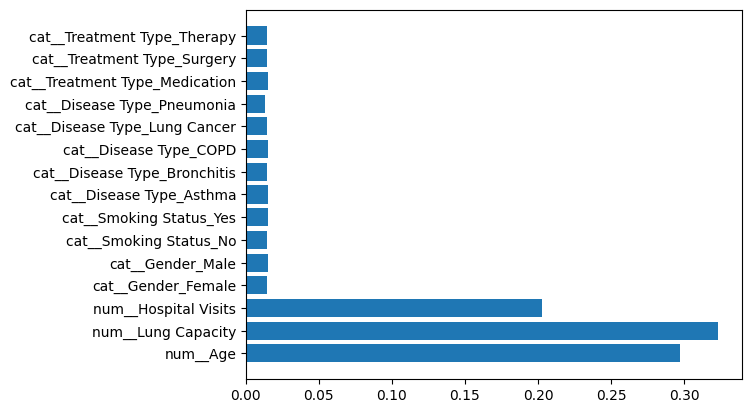

In [ ]:
import matplotlib.pyplot as plt

model = RandomForestClassifier()
model.fit(X_train, y_train)

plt.barh(range(len(model.feature_importances_)), model.feature_importances_)
plt.yticks(ticks=range(len(preprocesser.get_feature_names_out())),
        labels=preprocesser.get_feature_names_out())
plt.show()


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

model = LogisticRegression(max_iter=1000)
# Add class weighting or regularization
# model = LogisticRegression(max_iter=1000, class_weight='balanced', C=0.1)
model.fit(X_train, y_train)
preditctions = model.predict(X_test)

print(f"Train accuracy: {model.score(X_train, y_train)}\n")
print(f"Test accuracy: {model.score(X_test, y_test)}\n")
print(classification_report(y_test, preditctions))

scores = cross_val_score(model, X_train, y_train, cv=110)
print(f"Cross-validation accuracy: {np.mean(scores):.2f}")

Train accuracy: 0.5240825688073395

Test accuracy: 0.5154320987654321

              precision    recall  f1-score   support

           0       0.52      0.54      0.53       325
           1       0.51      0.49      0.50       323

    accuracy                           0.52       648
   macro avg       0.52      0.52      0.52       648
weighted avg       0.52      0.52      0.52       648

Cross-validation accuracy: 0.51


C:\Users\Sachar\AppData\Local\Temp\ipykernel_21432\3847726697.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Accuracy", y="Model", data=df_scores, palette="viridis")


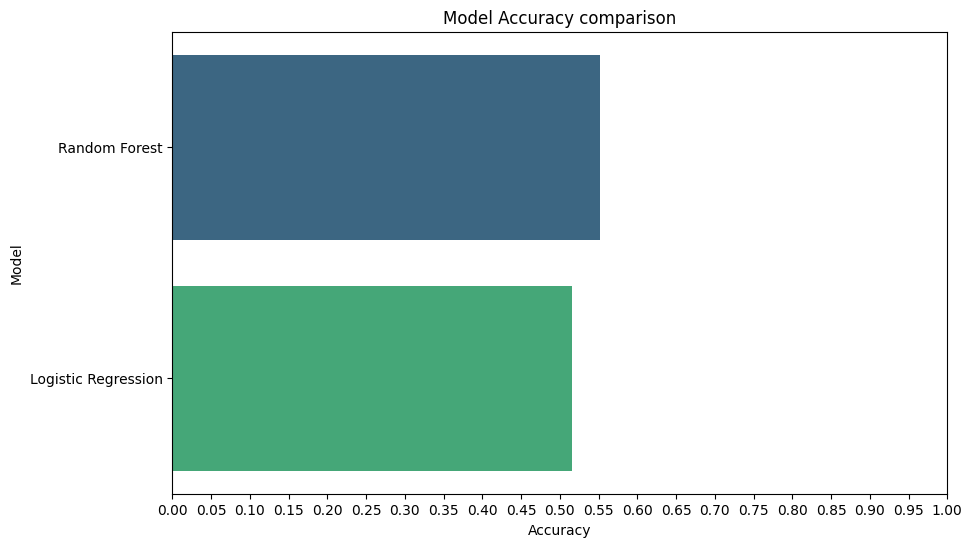

In [78]:
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

models ={
    "Random Forest": RandomForestClassifier(),
    "Logistic Regression": LogisticRegression()
}

scores = {}
cms = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    scores[name] = accuracy_score(y_test, y_pred)
    cms[name] = confusion_matrix(y_test, y_pred)


df_scores = pd.DataFrame({"Model": scores.keys(), "Accuracy": scores.values()})
df_scores = df_scores.sort_values("Accuracy", ascending=False)

#create the bar plot
plt.figure(figsize=(10,6))
sns.barplot(x="Accuracy", y="Model", data=df_scores, palette="viridis")
plt.title("Model Accuracy comparison")
plt.xlim(0,1.0)
plt.xticks([0, 0.05, 0.10, 0.15, 0.20, 0.25, 0.30, 0.35, 0.40, 0.45, 0.50, 0.55, 0.60, 0.65, 0.70, 0.75, 0.80, 0.85, 0.90, 0.95, 1.0])
plt.show()

#### **Plotting the heatmap for used training algorithms**

In [77]:
fig, axes = plt.subplots(1, len(models), figsize=(15, 5))

for (name, cm), ax in zip(cms.items(), axes):
    sns.heatmap(cm, annot=True, fmt="d", cmap="coolwarm", ax=ax)
    ax.set_title(f"{name}\nAccuracy: {scores[name]:.2f}")
    ax.set_xlabel("Predicted")
    ax.set_ylabel("Actual")

plt.tight_layout()
plt.show()

NameError: name 'models' is not defined

In [59]:
import shap
print("Now you can check your predicted survival chances\n\n")
print("Fill in your age")
input_age = float(input())
print("Fill in your gender either Male or Female")
input_gender = str(input())
print("Fill in your smoking status with a Yes for smoker and No for non-smoker")
input_smoking = str(input())
print("Fill in your lung capacity")
input_lung_capacity = float(input())
print("Choose what lung disease you have, if you don't know fill in 0\n 1: Asthma\n 2: COPD\n 3: Bronchitis\n 4: Pneumonia\n 5: Lung Cancer")
disease_choice = input().strip()  # Capture input once
input_lung_disease = {
    "1": "Asthma",
    "2": "COPD", 
    "3": "Bronchitis",
    "4": "Pneumonia",
    "5": "Lung Cancer"
}.get(disease_choice, None)

# Treatment type selection 
print("Choose the tratment type you are receiving for the lung disease, if you don't know fill in 0\n 1: Therapy\n 2: Surgery\n 3: Medication")
treatment_choice = input().strip()  # Capture input once
input_treatment = {
    "1": "Therapy",
    "2": "Surgery",
    "3": "Medication"
}.get(treatment_choice, None)

print("Fill in how often you have visited the hospital regarding your lung disease as an Integer")
input_hospital_visits = float(input())

# Collect user input (your existing code)
# ...

# Create a DataFrame with the SAME COLUMN NAMES as the training data
user_data = pd.DataFrame({
    "Age": [input_age],
    "Gender": [input_gender],
    "Smoking Status": [input_smoking],
    "Lung Capacity": [input_lung_capacity],
    "Disease Type": [input_lung_disease],
    "Treatment Type": [input_treatment],
    "Hospital Visits": [input_hospital_visits]
})

#79.0,Male,Yes,5.45,Bronchitis,Medication,12.0,No

# Later, during prediction:
user_data_prediction_for_recovery = preprocesser.transform(user_data)  # Transform user input
user_prediction = model.predict(user_data_prediction_for_recovery)
print(f"\n\nIs there a chance you recover: {user_prediction}\n")

Now you can check your predicted survival chances


Fill in your age
Fill in your gender either Male or Female
Fill in your smoking status with a Yes for smoker and No for non-smoker
Fill in your lung capacity
Choose what lung disease you have, if you don't know fill in 0
 1: Asthma
 2: COPD
 3: Bronchitis
 4: Pneumonia
 5: Lung Cancer
Choose the tratment type you are receiving for the lung disease, if you don't know fill in 0
 1: Therapy
 2: Surgery
 3: Medication
Fill in how often you have visited the hospital regarding your lung disease as an Integer


Is there a chance you recover: [1]



In [61]:
print(data['Recovered'].value_counts(normalize=True))

Recovered
Yes    0.504017
No     0.495983
Name: proportion, dtype: float64
